# <center>TUGAS HANDS-ON 1</center>

---

<center>Sikah Nubuahtul Ilmi</center>  
<center>NIM: 122140208</center>

---

Repository GitHub:
[Link GitHub](https://github.com/sigawari/handson-1-if4021)

Audio Input (Berita.wav):
[File_Audio_HandsOn1](https://drive.google.com/drive/folders/1gPmMH7YiiDmYg40ca8kqykiKrwCnD-zK?usp=sharing)

##  Soal 1: Visualisasi Audio 20 Detik

### Proses Rekaman:
Saya merekam suara saya sendiri selama **25-26 detik**, dengan membaca sebuah teks berita dan melakukan variasi volume serta gaya suara sesuai instruksi berikut:

- **Detik 1–5**: Saya membaca dengan **suara sangat pelan / berbisik**
- **Detik 6–10**: Saya membaca dengan **suara normal**
- **Detik 11–15**: Saya membaca dengan **suara keras**
- **Detik 16–20**: Saya membaca dengan **suara cempreng atau dibuat-buat cempreng**
- **Detik 20–25**: Saya membaca dengan **suara berteriak**

---

### Format Rekaman:
Saya menyimpan rekaman dalam format **`.wav`**. Apabila rekaman saya berada dalam format lain (seperti `.mp3`), saya mengonversinya terlebih dahulu ke `.wav` sebelum memuatnya ke dalam notebook. Audio yang saya rekam saya sesuaikan lagi agar sesuai dengan spek yang diminta.

---

### Proses Visualisasi:
1. Saya memuat file audio `.wav` ke dalam notebook
2. Saya melakukan visualisasi dalam dua bentuk:
   - **Waveform** (amplitudo terhadap waktu)
   - **Spektogram** (frekuensi terhadap waktu)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import librosa
import librosa.display
import os
import soundfile as sf

In [5]:
file_path = os.path.join(os.getcwd(), 'file_audio', 'berita.wav')

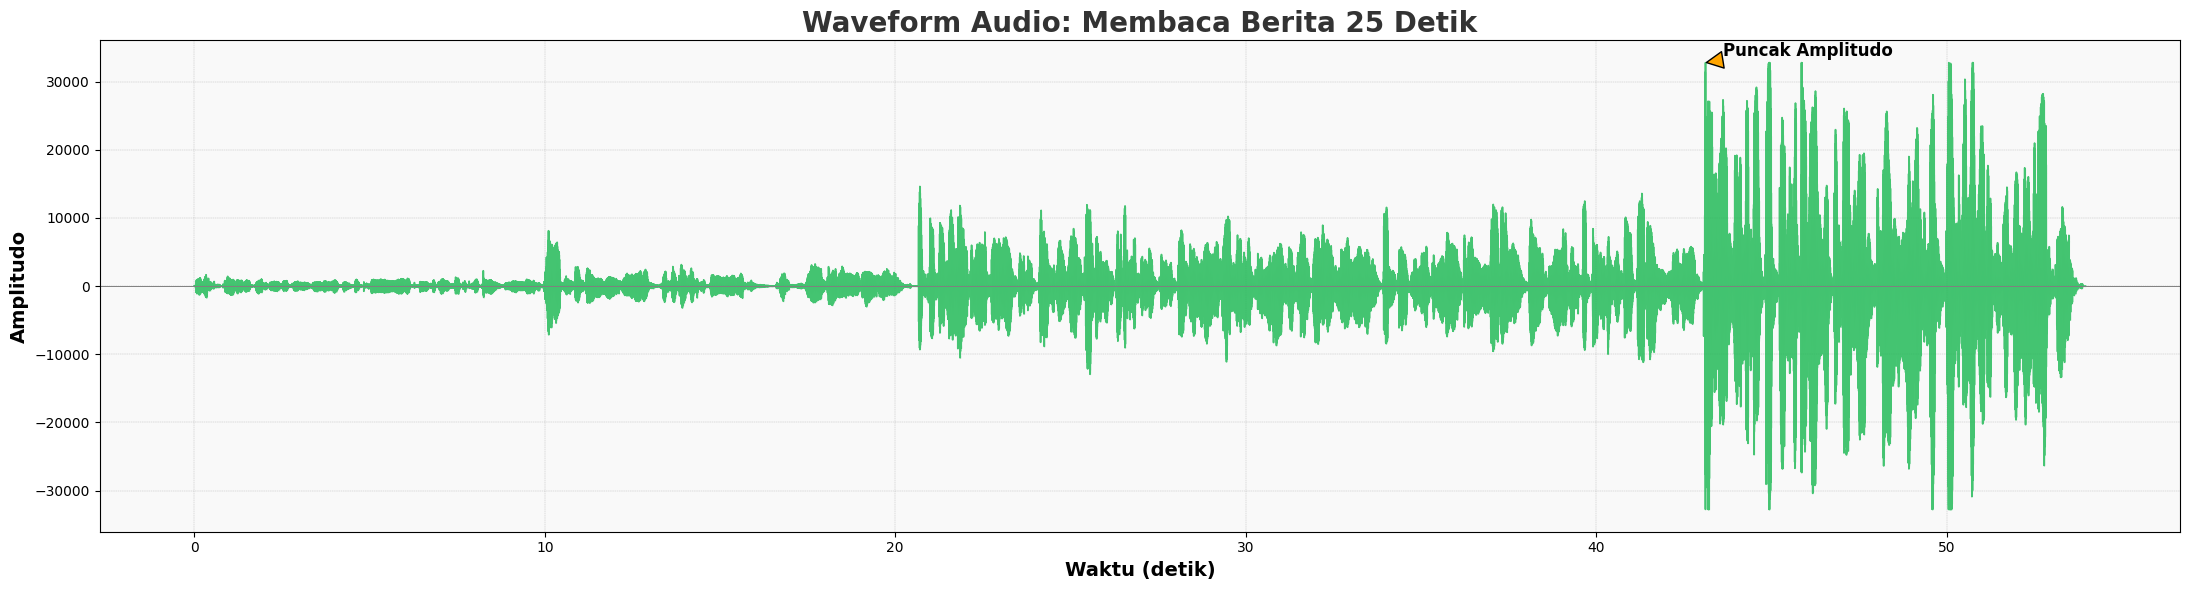

In [6]:
with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_info = np.frombuffer(frames, dtype=np.int16)
    frame_rate = wav_file.getframerate()
    time = np.linspace(0, len(sound_info) / frame_rate, num=len(sound_info))

    plt.figure(figsize=(22, 6))
    plt.plot(time, sound_info, color="#1DB954", linewidth=1.2, alpha=0.8)

    plt.title('Waveform Audio: Membaca Berita 25 Detik', fontsize=20, fontweight='bold', color="#333333")
    plt.xlabel('Waktu (detik)', fontsize=14, fontweight='bold')
    plt.ylabel('Amplitudo', fontsize=14, fontweight='bold')

    plt.grid(True, which='both', linestyle='--', linewidth=0.3, color='#888888', alpha=0.6)
    plt.gca().set_facecolor('#F9F9F9')
    plt.gcf().patch.set_facecolor('#FFFFFF')

    plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.7)
    plt.fill_between(time, sound_info, color="#1DB954", alpha=0.1)  # Area fill

    max_amp = np.max(sound_info)
    max_time = time[np.argmax(sound_info)]
    plt.annotate('Puncak Amplitudo',
                 xy=(max_time, max_amp),
                 xytext=(max_time + 0.5, max_amp + 1000),
                 arrowprops=dict(facecolor='orange', shrink=0.05),
                 fontsize=12, color='black', fontweight='bold')

    # Tampilan rapih
    plt.tight_layout()
    plt.show()

In [7]:
y, sr = librosa.load(file_path)

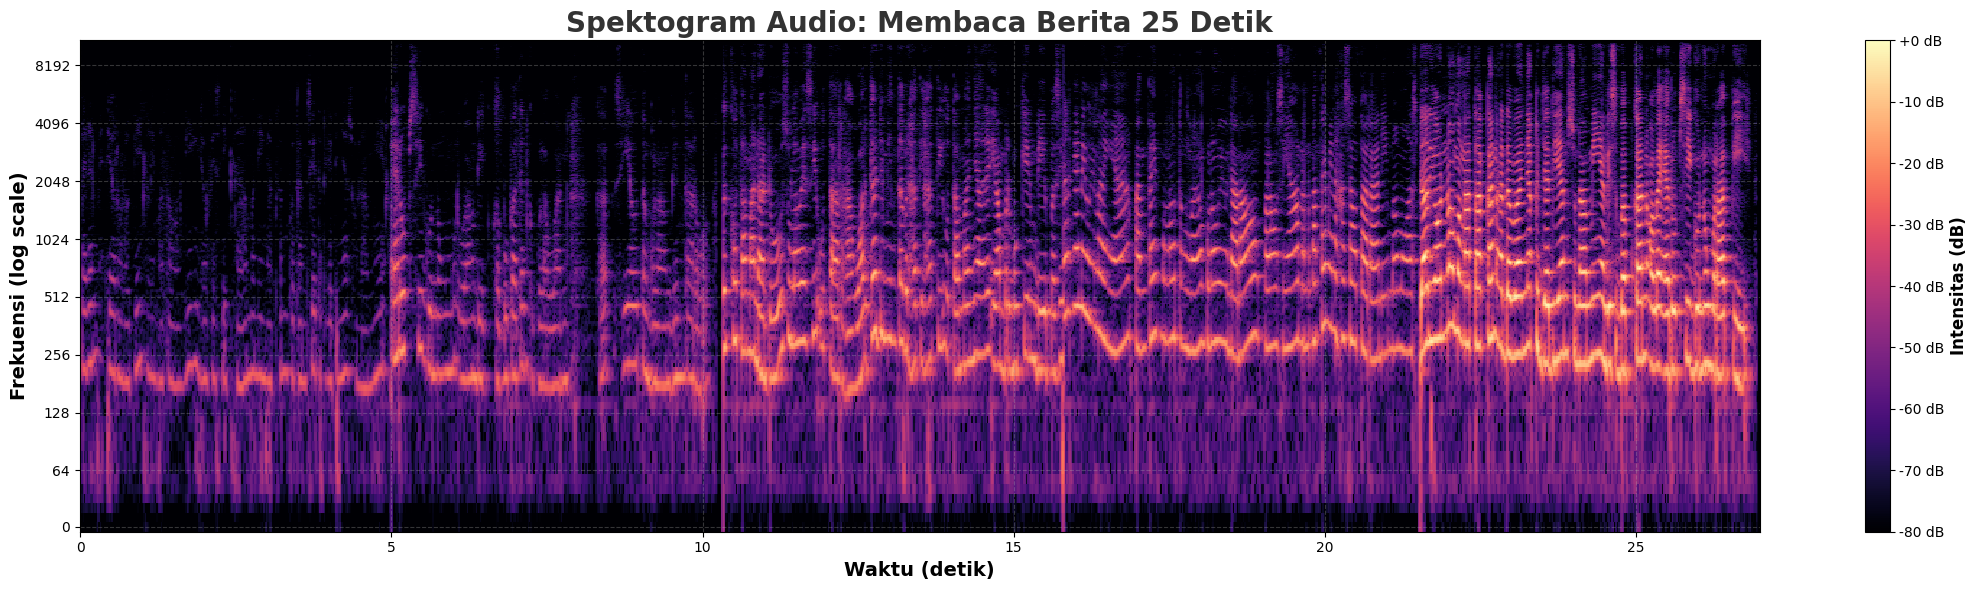

In [8]:
# Hitung spektogram
plt.figure(figsize=(22, 6))
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# Tampilkan spektogram
librosa.display.specshow(
    S_db,
    sr=sr,
    x_axis='time',
    y_axis='log',
    cmap='magma'
)

# Tambahkan colorbar yang informatif
cbar = plt.colorbar(format='%+2.0f dB')
cbar.set_label('Intensitas (dB)', fontsize=12, fontweight='bold')

# Tambahkan detail visual
plt.title('Spektogram Audio: Membaca Berita 25 Detik', fontsize=20, fontweight='bold', color='#333')
plt.xlabel('Waktu (detik)', fontsize=14, fontweight='bold')
plt.ylabel('Frekuensi (log scale)', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3)

plt.gca().set_facecolor('#FDFDFD')
plt.gcf().patch.set_facecolor('#FFFFFF')

plt.tight_layout()
plt.show()

### Analisis Singkat:

1. **Waveform**

- **0–5 detik (Suara Berbisik)**  
  Amplitudo sangat rendah, hampir mendekati garis nol, dengan gelombang tipis yang menunjukkan suara pelan.

- **5–10 detik (Suara Normal)**  
  Amplitudo meningkat secara moderat, gelombang lebih padat dan teratur.

- **10–15 detik (Suara Keras)**  
  Amplitudo meningkat pesat, dengan gelombang besar dan padat, menunjukkan suara yang kuat.

- **15–20 detik (Suara Cempreng)**  
  Terdapat puncak amplitudo yang tinggi, dengan gelombang yang lebih tajam dan kadang menyentak.

- **20 detik ke atas (Suara Berteriak)**  
  Amplitudo sangat besar dan mendekati kliping, menunjukkan kemungkinan distorsi pada audio.

---
2. **Spektrogram**

- **0–5 detik (Suara Berbisik)**  
  Intensitas rendah, hanya frekuensi rendah yang terlihat samar.

- **5–10 detik (Suara Normal)**  
  Frekuensi mulai lebih beragam, intensitas meningkat, tampak warna lebih terang.

- **10–15 detik (Suara Keras)**  
  Banyak frekuensi tinggi muncul, intensitas mulai terang dan menyebar ke atas.

- **15–20 detik (Suara Cempreng)**  
  Banyak frekuensi tinggi diaktifkan, dengan intensitas maksimal dan pola tajam.

- **20 detik ke atas (Suara Berteriak)**  
  Intensitas sangat tinggi, pola harmonik sangat padat, dan warna spektrogram mendekati putih atau kuning cerah.


## Soal 2: Penerapan Teknik Fading pada Musik

### Musik yang Dipilih:
Untuk soal ini, saya menggunakan hasil editing musik **"Tropical Theraphy" dari One OK Rock** dengan durasi **30 detik**. Potongan musik ini **tidak memiliki efek fading** di bagian awal maupun akhir, sehingga sesuai dengan kriteria soal.

---

### Proses Editing:
Saya menerapkan teknik **fading in** pada bagian awal dan **fading out** pada bagian akhir musik untuk menghasilkan transisi suara yang lebih halus. Proses fading ini dilakukan dengan menggunakan bantuan pustaka `librosa` dan `numpy`.

- **Fade in**: volume suara secara bertahap meningkat di awal musik
- **Fade out**: volume suara secara bertahap menurun di akhir musik

---

### Langkah-Langkah yang Dilakukan:
1. Saya memuat file audio `.wav` hasil editing ke dalam notebook
2. Saya menghitung jumlah sample untuk proses fading in dan out
3. Saya mengalikan bagian awal dan akhir dengan faktor peningkatan dan penurunan volume menggunakan array linear
4. Saya menyimpan hasil audio yang sudah difade ke file baru
5. Saya memvisualisasikan waveform sebelum dan sesudah diterapkan efek fade


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import os
import wave
from pydub import AudioSegment
from pydub.playback import play

c:\Users\62822\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [10]:
# Memuat audio file
file_path = os.path.join(os.getcwd(), 'file_audio', 'tropical.wav')
audio = AudioSegment.from_file(file_path)

In [11]:
duration_ms = 30000

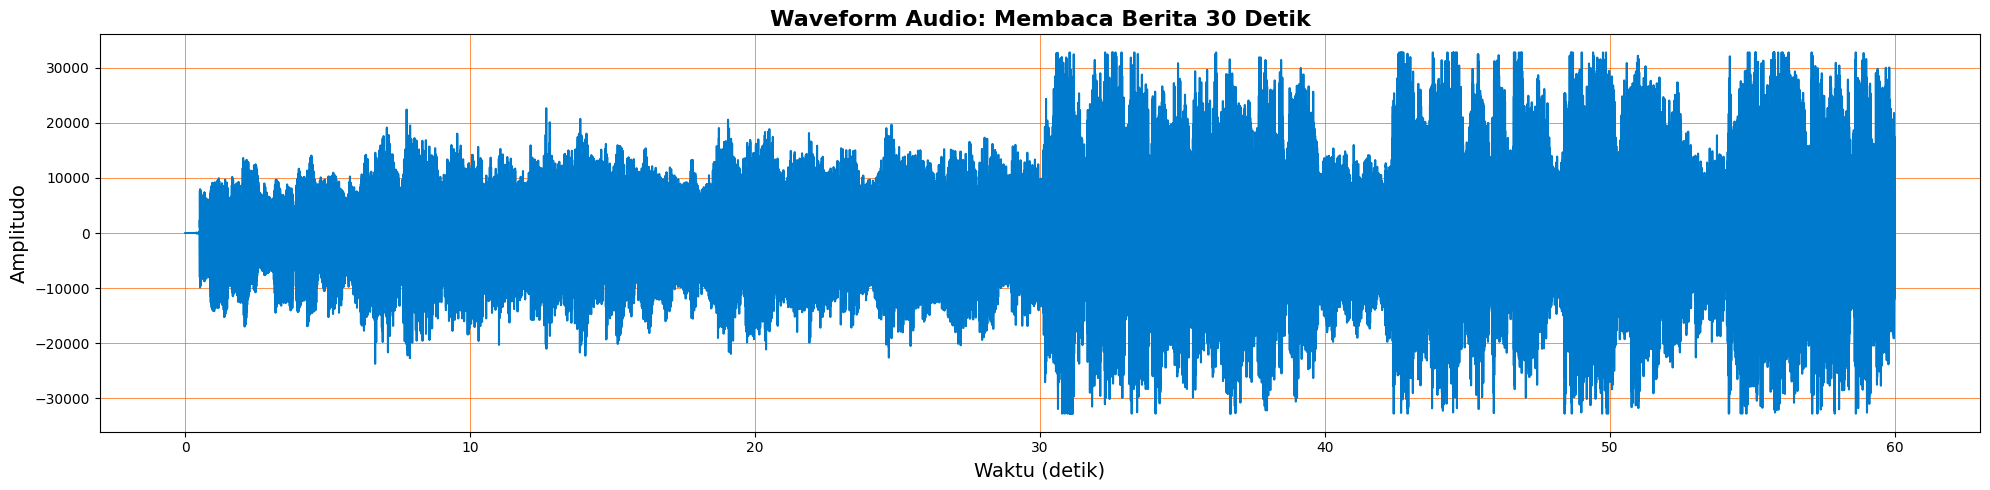

In [12]:
# Visualisasi waveform audio sebelum Fading
with wave.open(file_path, 'r') as wav_file:
    # Read frames and extract audio data
    frames = wav_file.readframes(-1)
    sound_info = np.frombuffer(frames, dtype=np.int16)
    
    # Get the frame rate (sampling rate)
    frame_rate = wav_file.getframerate()
    
    # Create a time array for the x-axis
    time = np.linspace(0, len(sound_info) / frame_rate, num=len(sound_info))

    # Create the plot
    plt.figure(figsize=(20, 5))
    
    # Plot the waveform
    plt.plot(time, sound_info, color="#007ACC")
    
    # Title and labels
    plt.title('Waveform Audio: Membaca Berita 30 Detik', fontsize=16, fontweight='bold')
    plt.ylabel('Amplitudo', fontsize=14)
    plt.xlabel('Waktu (detik)', fontsize=14)
    
    # Add grid with customized color and linewidth
    plt.grid(linewidth=0.5, color='#FF6500')
    
    # Set tight layout
    plt.tight_layout()
    
    # Display the plot
    plt.show()

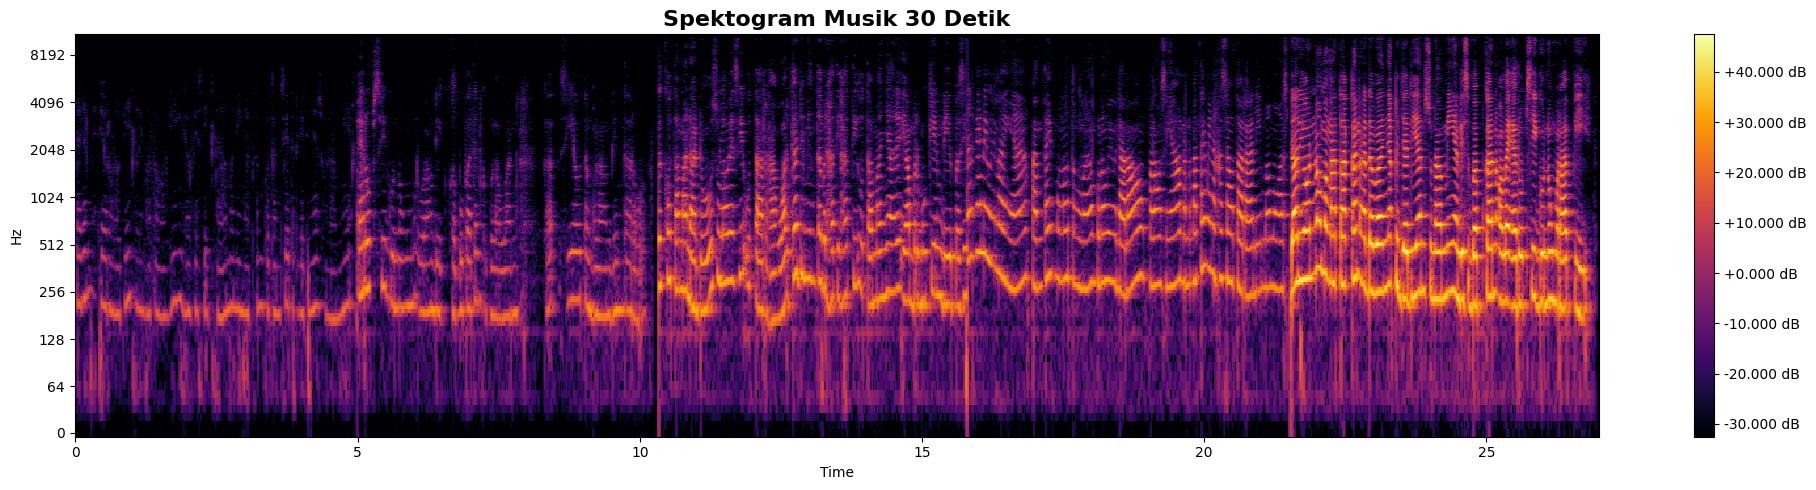

In [13]:
# Visualisasi spectogram audio sebelum fading
plt.figure(figsize=(20, 5))
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S))

# Hasil
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='inferno')
plt.colorbar(format='%+0.3f dB')
plt.title('Spektogram Musik 30 Detik', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
# Fading Logaritmik
def logarithmic_fade(audio, fade_in=True, duration_ms=30000):
    steps = duration_ms // 10  # Setiap 10 ms langkah
    start_dB = -40.0 if fade_in else 0.0  # Mulai dari -40 dB untuk fade in
    end_dB = 0.0 if fade_in else -40.0  # Akhiri di 0 dB untuk fade in, atau turun ke -40 dB untuk fade out

    faded_audio = AudioSegment.silent(duration=0)  # Mulai dengan audio kosong

    for i in range(steps):
        volume_dB = start_dB + (end_dB - start_dB) * (1 - np.log10(i + 1) / np.log10(steps + 1))
        segment = audio[i * 10:(i + 1) * 10].apply_gain(volume_dB)  # Gunakan apply_gain() untuk perubahan volume
        faded_audio += segment  # Gabungkan setiap segmen audio

    return faded_audio

In [15]:
duration_fade= 8000

In [16]:
# Terapkan fade bawaan untuk perbandingan
faded_in_audio_builtin = audio.fade_in(duration_fade)
faded_out_audio_builtin = audio.fade_out(duration_fade)
faded_in_out_audio_builtin = audio.fade_in(duration_fade).fade_out(duration_fade)

In [17]:
# Menerapkan fungsi logaritmik
faded_in_audio_log = logarithmic_fade(audio, fade_in=True, duration_ms=duration_fade)
faded_out_audio_log = logarithmic_fade(audio, fade_in=False, duration_ms=duration_fade)
faded_in_out_audio_log = logarithmic_fade(faded_in_audio_log, fade_in=False, duration_ms=duration_fade)

In [18]:
# Menentukan jalur direktori untuk menyimpan file output
output_dir = os.path.join(os.getcwd(), 'file_audio', 'outputfading30s')
os.makedirs(output_dir, exist_ok=True)

In [19]:
# Simpan hasilnya
faded_in_audio_builtin.export(os.path.join(output_dir, 'faded_in_builtin.wav'), format="wav")
faded_out_audio_builtin.export(os.path.join(output_dir, 'faded_out_builtin.wav'), format="wav")
faded_in_audio_log.export(os.path.join(output_dir, 'faded_in_logarithmic.wav'), format="wav")
faded_out_audio_log.export(os.path.join(output_dir, 'faded_out_logarithmic.wav'), format="wav")
faded_in_out_audio_builtin.export(os.path.join(output_dir, 'faded_in_out_builtin.wav'), format="wav")

<_io.BufferedRandom name='c:\\Users\\62822\\Documents\\Semester6\\Mulmed\\Sikah\\file_audio\\outputfading30s\\faded_in_out_builtin.wav'>

In [20]:
print("File audio dengan efek fade in dan fade out telah disimpan!")

File audio dengan efek fade in dan fade out telah disimpan!


In [21]:
# Menampilkan waveform setelah fade in
file_in = os.path.join(os.getcwd(), output_dir, 'faded_in_builtin.wav')
audio = AudioSegment.from_file(file_path)

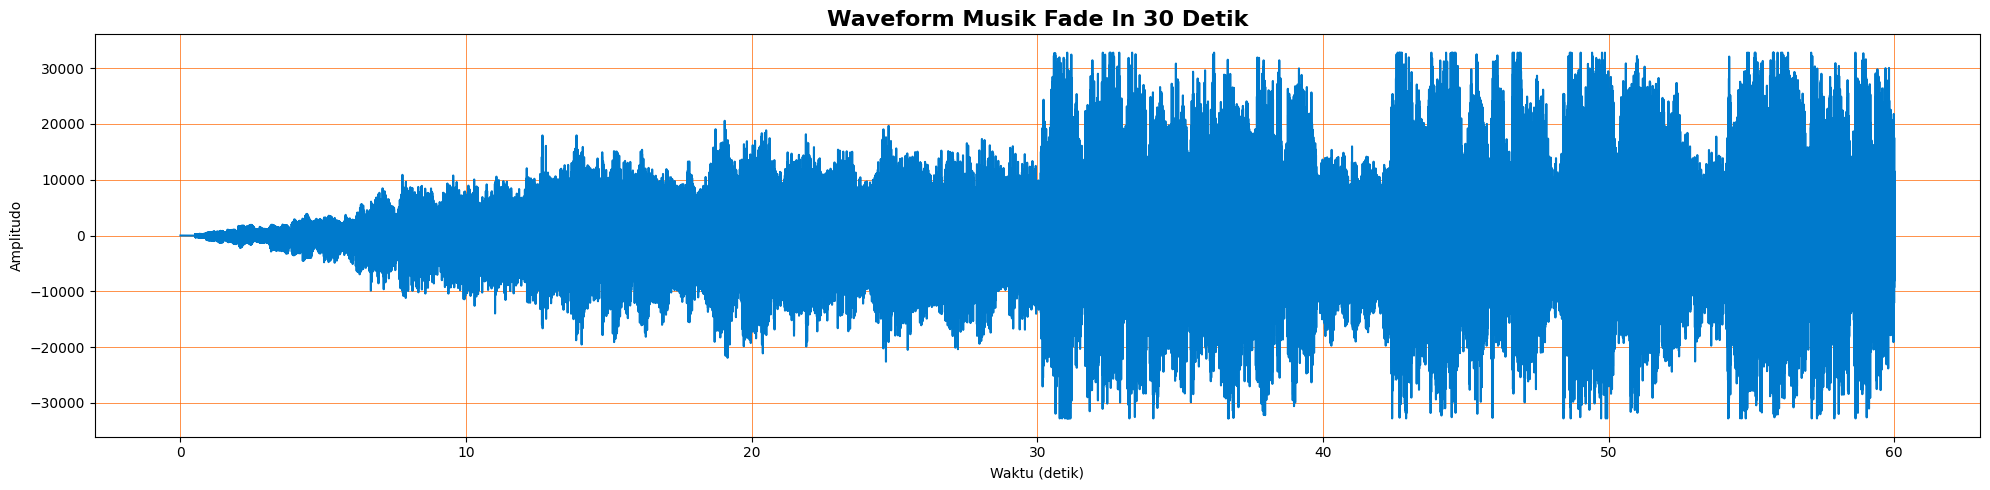

In [22]:
# Visualisasi waveform audio fade in
with wave.open(file_in, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_info = np.frombuffer(frames, dtype=np.int16)
    frame_rate = wav_file.getframerate()
    time = np.linspace(0, len(sound_info) / frame_rate, num=len(sound_info))

    plt.figure(figsize=(20, 5))
    plt.plot(time, sound_info, color="#007ACC")
    plt.title('Waveform Musik Fade In 30 Detik', fontsize=16, fontweight='bold')
    plt.ylabel('Amplitudo')
    plt.xlabel('Waktu (detik)')
    plt.grid(linewidth=0.5, color='#FF6500')
    plt.tight_layout()
    plt.show()

In [23]:
# Menampilkan waveform setelah fade out
file_out = os.path.join(os.getcwd(), output_dir, 'faded_out_builtin.wav')
audio = AudioSegment.from_file(file_path)

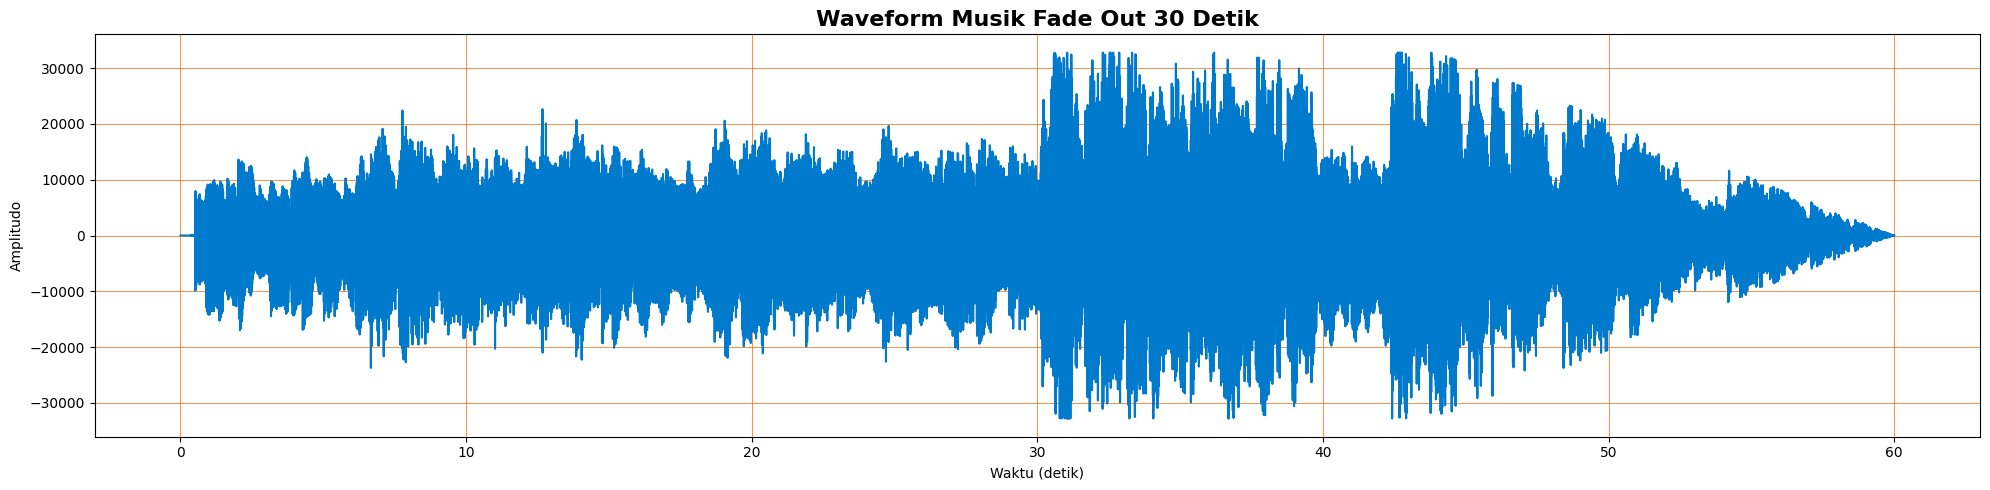

In [24]:
# Visualisasi waveform audio fade out
with wave.open(file_out, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_info = np.frombuffer(frames, dtype=np.int16)
    frame_rate = wav_file.getframerate()
    time = np.linspace(0, len(sound_info) / frame_rate, num=len(sound_info))

    plt.figure(figsize=(20, 5))
    plt.plot(time, sound_info, color="#007ACC")
    plt.title('Waveform Musik Fade Out 30 Detik', fontsize=16, fontweight='bold')
    plt.ylabel('Amplitudo')
    plt.xlabel('Waktu (detik)')
    plt.grid(linewidth=0.5, color='#FF6500')
    plt.tight_layout()
    plt.show()

In [25]:
# Menampilkan waveform setelah fade in-out
file_in_out = os.path.join(os.getcwd(), output_dir, 'faded_in_out_builtin.wav')
audio = AudioSegment.from_file(file_path)

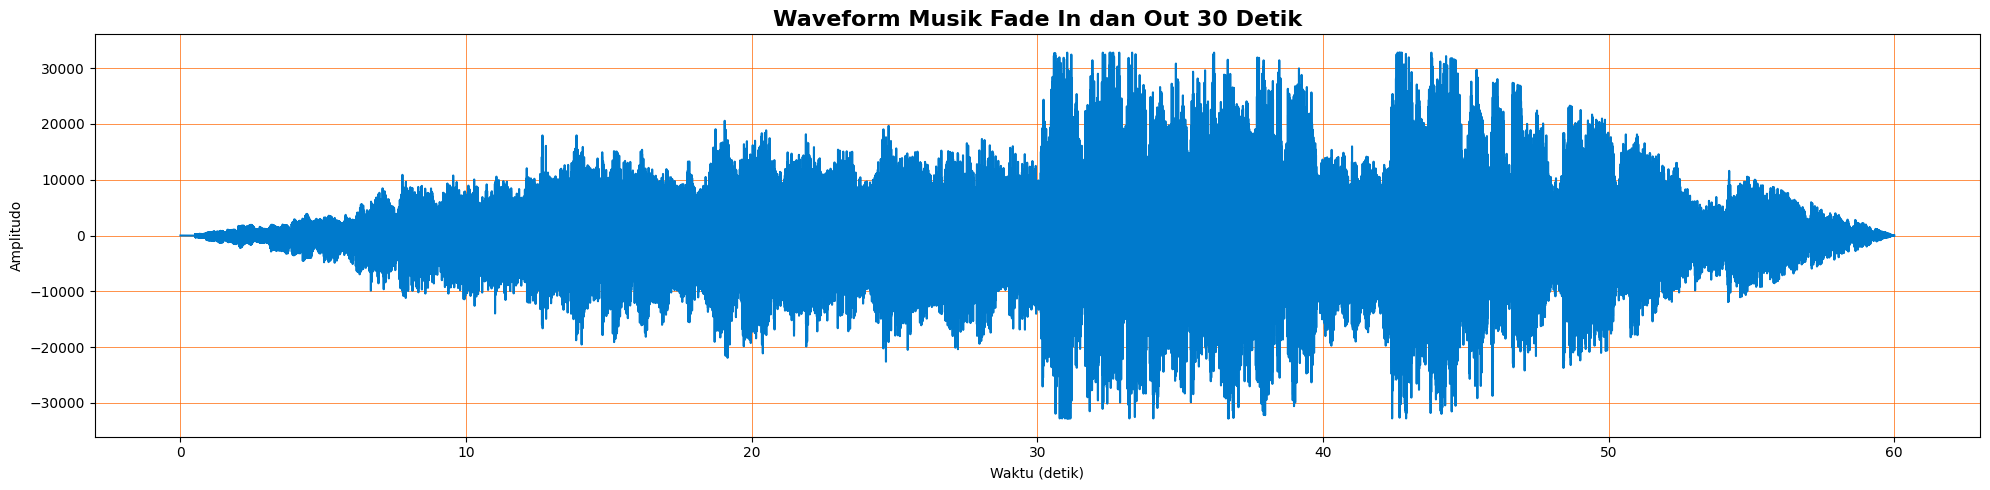

In [26]:
# Visualisasi waveform audio fade out
with wave.open(file_in_out, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_info = np.frombuffer(frames, dtype=np.int16)
    frame_rate = wav_file.getframerate()
    time = np.linspace(0, len(sound_info) / frame_rate, num=len(sound_info))

    plt.figure(figsize=(20, 5))
    plt.plot(time, sound_info, color="#007ACC")
    plt.title('Waveform Musik Fade In dan Out 30 Detik', fontsize=16, fontweight='bold')
    plt.ylabel('Amplitudo')
    plt.xlabel('Waktu (detik)')
    plt.grid(linewidth=0.5, color='#FF6500')
    plt.tight_layout()
    plt.show()

### Analisis Singkat:
Dari total keseluruhan audio yaitu 30 detik, dilakukan beberapa teknik fading untuk melakukan fading selama 8 detik. Teknik ini dilakukan di awal (fading in), di akhir (fading out), dan kombinasi keduanya.

## Soal 3: Penerapan Filter Equalisasi untuk Mengurangi Noise

### Rekaman yang Digunakan:
Untuk soal ini, saya merekam suara berbicara di sekitar keran air yang tengah mengalir dengan durasi kurang lebih 10 detik. Rekaman ini disimpan dalam format `.wav` dan memuat noise dominan dari suara air.

---

### Proses Filtering:
Saya menerapkan tiga jenis filter equalisasi pada rekaman untuk mengurangi noise:

- **High-pass filter**: menghilangkan frekuensi rendah seperti suara air
- **Low-pass filter**: mengurangi frekuensi tinggi seperti suara gemericik air.
- **Band-pass filter**: mempertahankan hanya frekuensi tengah (area suara manusia)

Filter dilakukan dengan pustaka `scipy.signal` dan `librosa`.

---

### Langkah-Langkah yang Dilakukan:
1. Memuat file rekaman `.wav` menggunakan `librosa`
2. Menerapkan tiga jenis filter:
   - High-pass dengan cutoff 300 Hz
   - Low-pass dengan cutoff 3000 Hz
   - Band-pass antara 300–3000 Hz
3. Membandingkan hasil filtering berdasarkan spektrogram masing-masing
4. Menganalisis keefektifan masing-masing filter terhadap noise dan kejelasan suara
5. Menyimpan hasil filtering terbaik ke dalam file `.wav`

---

### Visualisasi Spektrogram:
Saya menampilkan spektrogram dari keempat kondisi:
- Spektrogram asli (tanpa filter)
- Spektrogram setelah high-pass
- Spektrogram setelah low-pass
- Spektrogram setelah band-pass

Visualisasi ini membantu memahami bagaimana masing-masing filter memengaruhi distribusi frekuensi pada audio.

In [27]:
import wave
import os
import librosa
import numpy as py
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

In [28]:
file_path = os.path.join(os.getcwd(), 'file_audio', 'berisik.wav')

# Original sampling rate
y, sr = librosa.load(file_path, sr=None)
print (f"Sampling Rate: {sr}")

Sampling Rate: 44100


In [29]:
def high_pass_filter(audio_data, sr, cutoff=1000):
    # Filter Design
    b, a = signal.butter(2, cutoff, btype='high', fs=sr, output='ba')

    # Filter application
    filtered_audio = signal.lfilter(b, a, audio_data)

    return filtered_audio 

In [30]:
hpassed_audio = high_pass_filter(y, sr, cutoff=200)

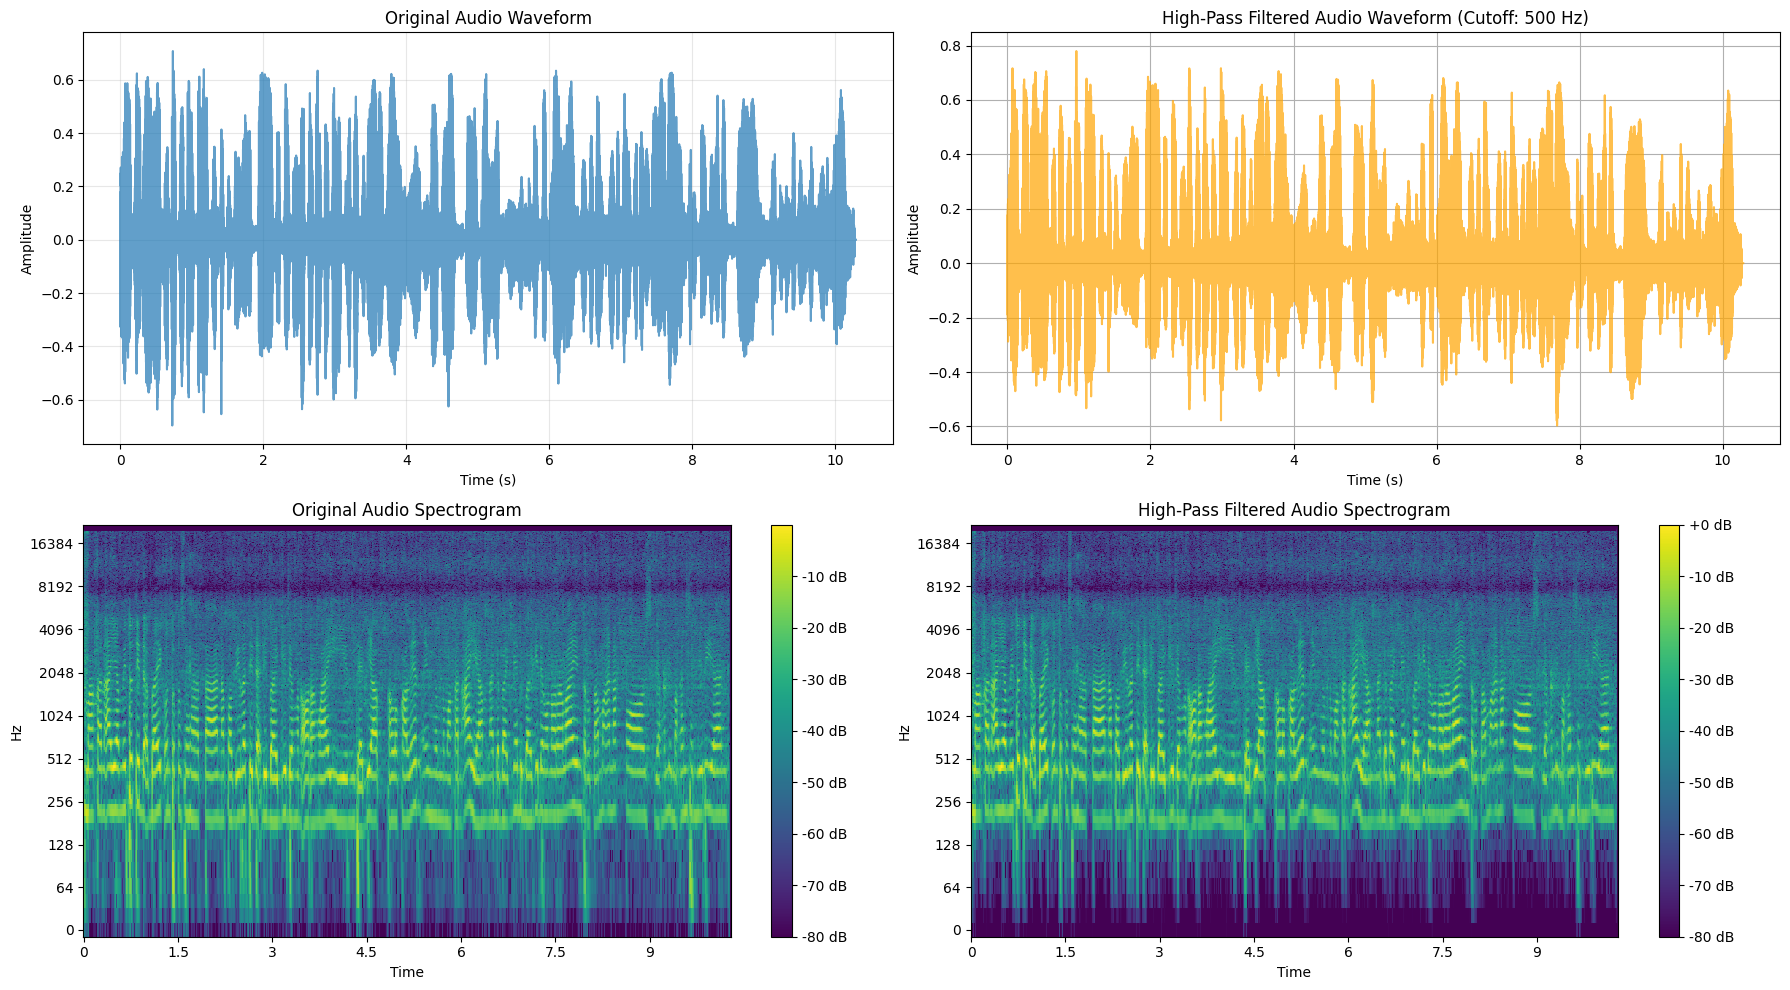

In [31]:
# Plotting dan Komparasi

plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, hpassed_audio, label='High-Pass Filtered', color='orange', alpha=0.7)
plt.title('High-Pass Filtered Audio Waveform (Cutoff: 500 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=1)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the high-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(hpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('High-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()

In [32]:
# Menentukan jalur direktori untuk menyimpan file output
output_dir = os.path.join(os.getcwd(), 'file_audio', 'outputequalization')
os.makedirs(output_dir, exist_ok=True)

In [33]:
# Save the filtered audio
output_path = os.path.join(output_dir, 'high_pass_filtered.wav')
sf.write(output_path, hpassed_audio, sr)
print(f"Filtered audio saved to {output_path}")

Filtered audio saved to c:\Users\62822\Documents\Semester6\Mulmed\Sikah\file_audio\outputequalization\high_pass_filtered.wav


In [34]:
def low_pass_filter(audio_data, sr, cutoff=1000):    
    b, a = signal.butter(2, cutoff, btype='low', fs=sr, output='ba')
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

In [35]:

# Apply low pass filter to the audio
lpassed_audio = low_pass_filter(y, sr, cutoff=550)

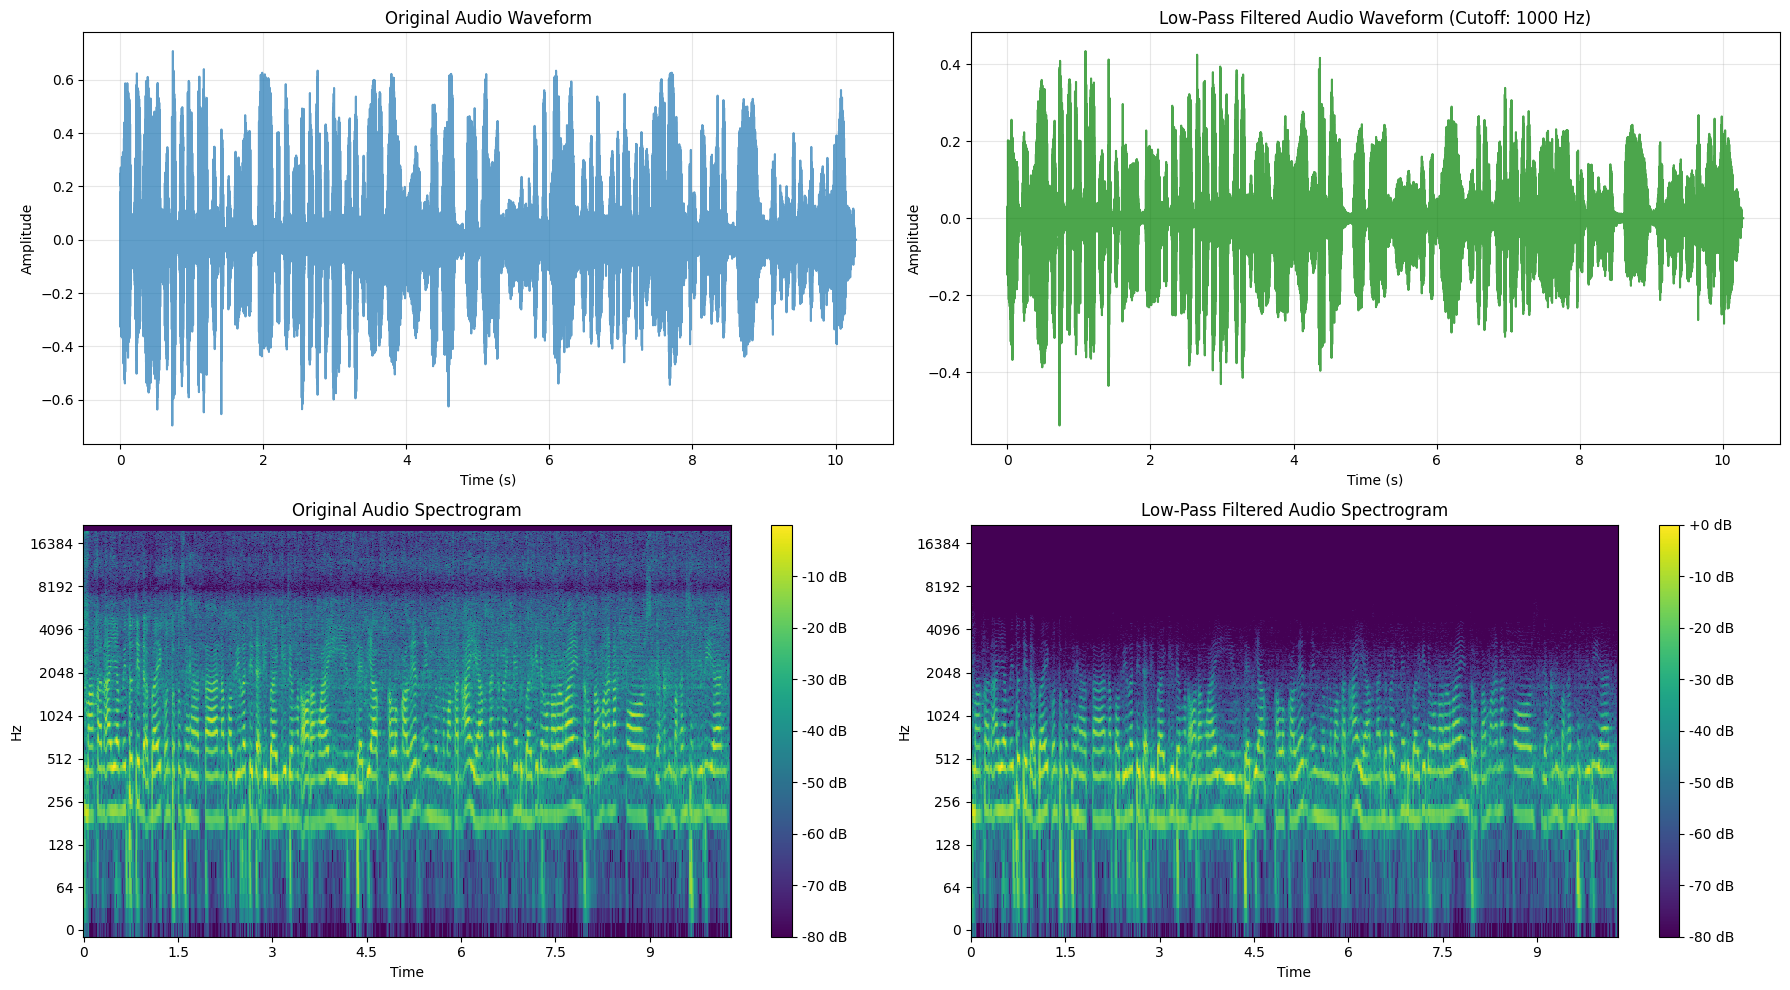

In [36]:
# Visualize the original and low-pass filtered audio
plt.figure(figsize=(18, 10))

# Time axis for plotting
time_axis = np.linspace(0, len(y) / sr, len(y))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, lpassed_audio, label='Low-Pass Filtered', color='green', alpha=0.7)
plt.title('Low-Pass Filtered Audio Waveform (Cutoff: 1000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the low-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(lpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Low-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()

In [37]:
# Save the low-pass filtered audio
output_path = os.path.join(output_dir, 'low_pass_filtered.wav')

sf.write(output_path, lpassed_audio, sr)
print(f"Low-pass filtered audio saved to {output_path}")

Low-pass filtered audio saved to c:\Users\62822\Documents\Semester6\Mulmed\Sikah\file_audio\outputequalization\low_pass_filtered.wav


In [38]:
def band_pass_filter(audio_data, sr, lowcut=500, highcut=2000):
    
    # Create a bandpass Butterworth filter
    b, a = signal.butter(2, [lowcut, highcut], btype='band', fs=sr, output='ba')
    
    # Apply the filter
    filtered_audio = signal.lfilter(b, a, audio_data)
    
    return filtered_audio

In [39]:
# Apply band pass filter to the audio
bpassed_audio = band_pass_filter(y, sr, lowcut=200, highcut=4500)

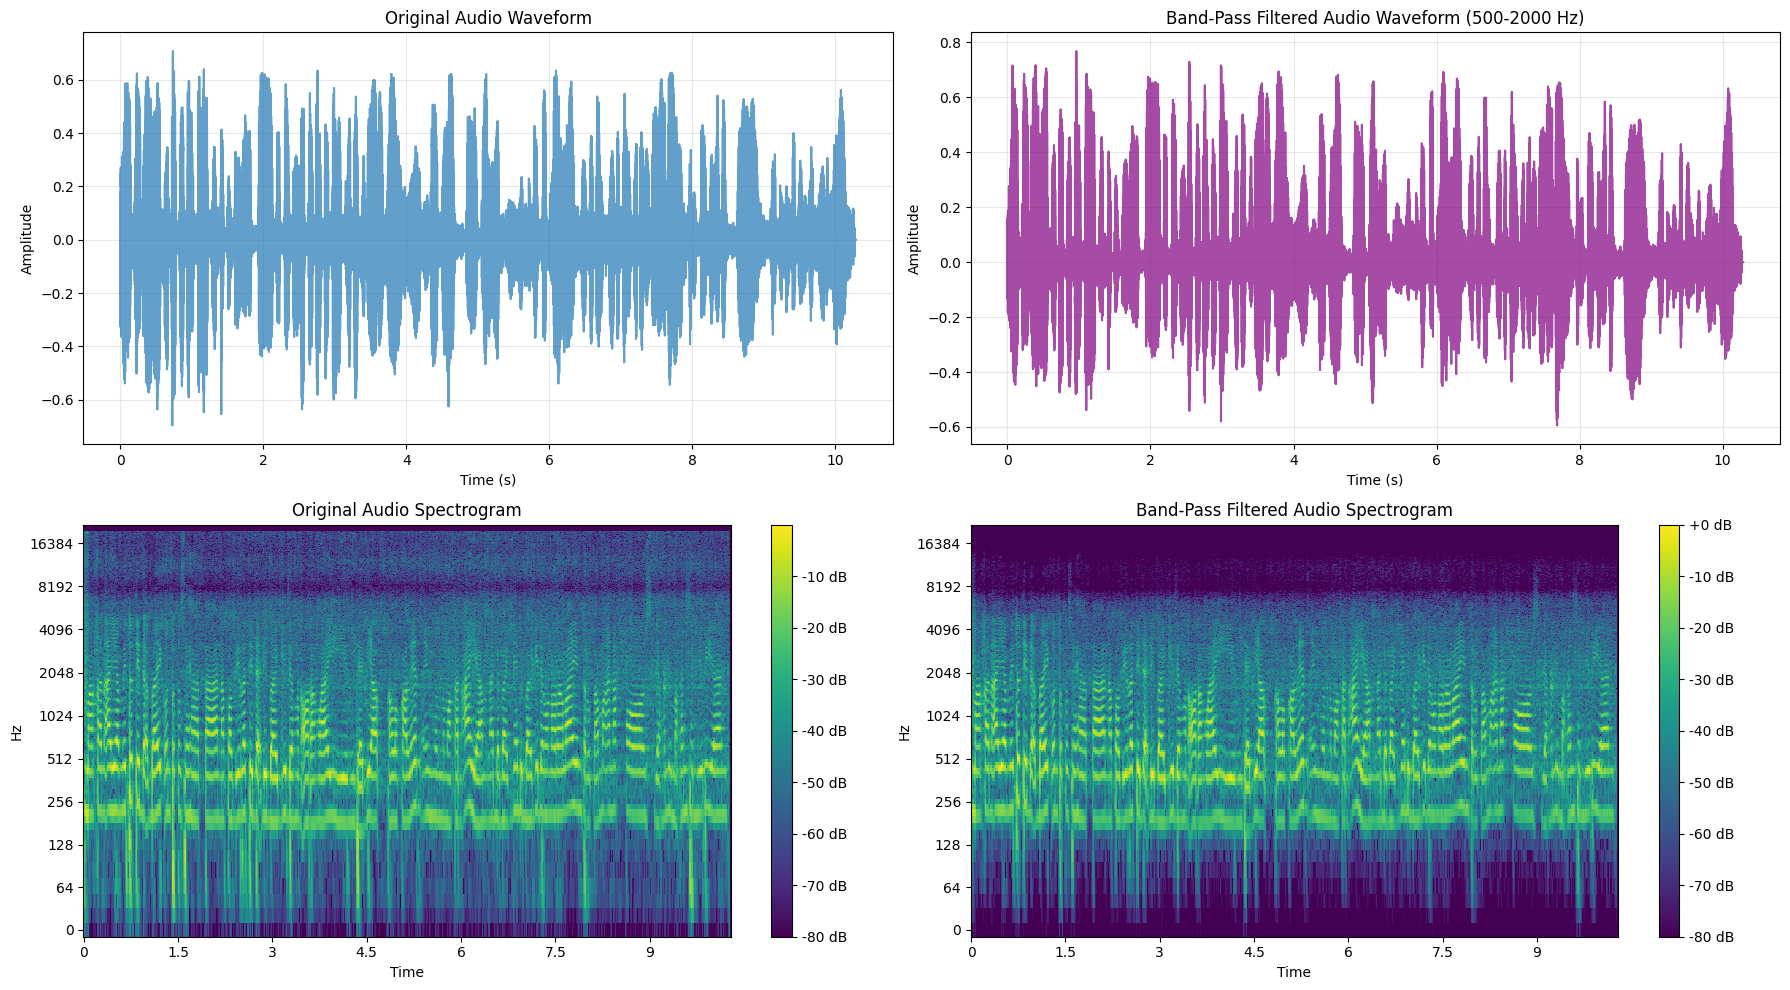

In [40]:
# Visualize the original and band-pass filtered audio
plt.figure(figsize=(18, 10))

# Plot the waveform comparison
plt.subplot(2, 2, 1)
plt.plot(time_axis, y, label='Original', alpha=0.7)
plt.title('Original Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(time_axis, bpassed_audio, label='Band-Pass Filtered', color='purple', alpha=0.7)
plt.title('Band-Pass Filtered Audio Waveform (500-2000 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)

# Calculate and plot the spectrogram of the original audio
plt.subplot(2, 2, 3)
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Audio Spectrogram')

# Calculate and plot the spectrogram of the band-pass filtered audio
plt.subplot(2, 2, 4)
D_filtered = librosa.amplitude_to_db(np.abs(librosa.stft(bpassed_audio)), ref=np.max)
librosa.display.specshow(D_filtered, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Band-Pass Filtered Audio Spectrogram')

plt.tight_layout()
plt.show()

In [41]:
# Save the band-pass filtered audio
output_path = os.path.join(output_dir, 'band_pass_filtered.wav')
sf.write(output_path, bpassed_audio, sr)

### Analisis Singkat:

- **Jenis noise**: Pada rekaman suara air, suara aliran air dominan berada pada **frekuensi rendah** (di bawah 500 Hz) dan **frekuensi tinggi** (di atas 4000 Hz). Frekuensi rendah biasanya berupa gema atau gemuruh aliran air, sementara frekuensi tinggi dapat mencakup percikan air atau suara air yang berdesir.

- **Filter paling efektif**: 
  - **Band-pass filter (500–2000 Hz)** paling efektif untuk mengurangi noise yang muncul, karena filter ini memungkinkan suara manusia (yang dominan di rentang frekuensi 300–3000 Hz) untuk tetap terdengar jelas sementara suara air yang berada di luar rentang ini akan dikurangi.
  - Filter **Low-pass** dengan cutoff rendah dan **High-pass** dengan cutoff tinggi dapat mengurangi suara air, tetapi band-pass lebih fokus pada pemrosesan suara ucapan.

- **Hasil filtering terbaik**:
  - **Suara bicara** menjadi lebih jelas dan terfokus. Suara air yang mengganggu, baik gemuruh maupun percikan, berkurang signifikan.
  - **Suara air** berkurang terutama pada frekuensi rendah dan tinggi, yang memperbaiki kualitas suara ucapan.
  - **Transkripsi ucapan** jadi lebih mudah dilakukan karena suara latar (air) sudah dikurangi dengan efektif.

- **Nilai cutoff yang memberikan hasil terbaik**:
  - **Low-pass filter (cutoff 1000 Hz)** sangat efektif untuk mengurangi noise pada frekuensi tinggi.
  - **High-pass filter (cutoff 500 Hz)** efektif untuk mengurangi suara di bawah rentang ucapan manusia.
  - **Band-pass filter (cutoff 500–2000 Hz)** memberikan hasil paling optimal karena hanya melewatkan rentang frekuensi yang relevan untuk ucapan manusia.


## Soal 4: Pitch Shifting Efek Chipmunk

### Rekaman yang Digunakan:
Untuk soal ini, saya menggunakan rekaman suara dari Soal 1. Tujuannya adalah menerapkan **pitch shifting ke atas** untuk menciptakan efek **chipmunk** atau suara yang lebih tinggi dan lucu.

---

### Proses Pitch Shifting:
Saya menggunakan pustaka `librosa` untuk melakukan pitch shifting dengan parameter berikut:

- **+7 semitone**: menaikkan pitch sedang
- **+12 semitone**: menaikkan pitch satu oktaf penuh

Pitch shifting dilakukan tanpa mengubah kecepatan (durasi tetap).

---

### Langkah-Langkah yang Dilakukan:
1. Memuat rekaman suara dari Soal 1
2. Menerapkan pitch shifting sebanyak +7 dan +12 semitone
3. Visualisasi waveform dan spektrogram:
   - Sebelum pitch shifting
   - Setelah pitch shifting +7
   - Setelah pitch shifting +12
4. Menggabungkan hasil pitch shifting +7 dan +12 menjadi satu file audio
5. Menganalisis perbedaan kualitas suara dan tampilan visual

---

### Visualisasi:
Saya menampilkan:
- **Waveform** dan **spektrogram** sebelum dan sesudah pitch shifting

---


### Output:
Hasil akhir disimpan sebagai:
`chipmunk_pitch_audio.wav`

In [42]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [43]:
# Path setup
file_path = os.path.join(os.getcwd(), 'file_audio', 'berita.wav')

In [44]:
# Menyalakan audio dengan sr original
y, sr = librosa.load(file_path, sr=None)
print(f"Sampling Rate: {sr}")

Sampling Rate: 44100


In [45]:

# Load file dengan librosa
audio_data, sr = librosa.load(file_path, sr=None)
print(f"Durasi rekaman: {librosa.get_duration(y=audio_data, sr=sr):.2f} detik")

Durasi rekaman: 26.98 detik


In [46]:
# Fungsi visualisasi
def plot_waveform_spectrogram(y, sr, title):
    fig, axs = plt.subplots(2, 1, figsize=(12, 6))
    
    # Waveform
    librosa.display.waveshow(y, sr=sr, ax=axs[0], alpha=0.7)
    axs[0].set_title(f"Waveform - {title}")
    
    # Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axs[1])
    axs[1].set_title(f"Spectrogram - {title}")
    fig.colorbar(img, ax=axs[1], format="%+2.0f dB")
    
    plt.tight_layout()
    plt.show()

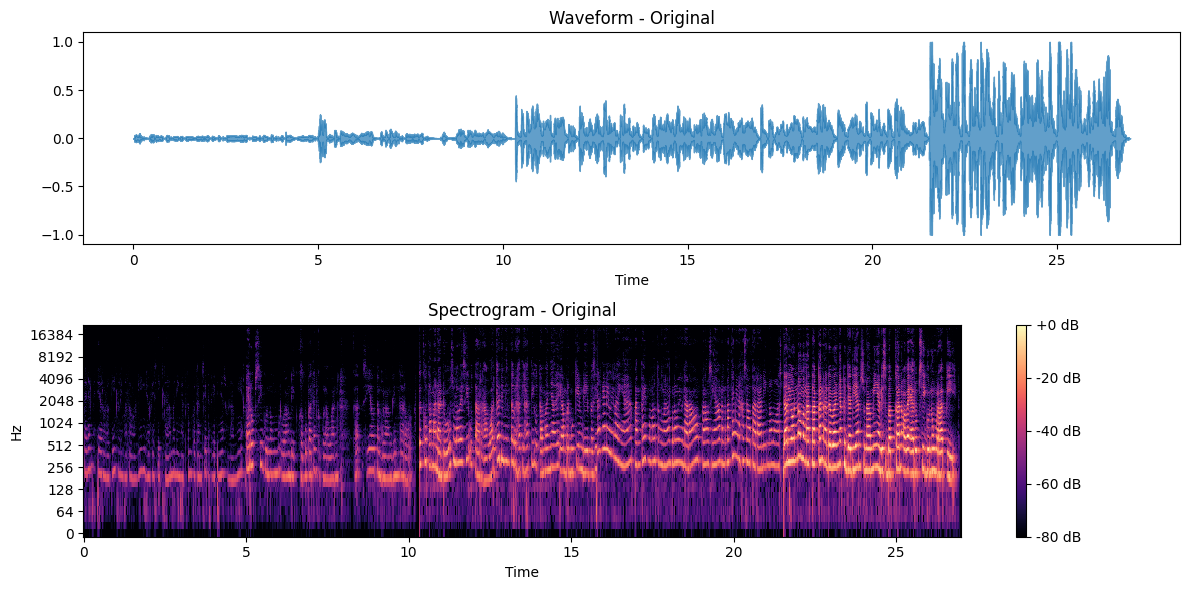

In [47]:
# Visualize original audio
plot_waveform_spectrogram(audio_data, sr, 'Original')

In [48]:
# Pitch shifting using librosa.effects.pitch_shift
def pitch_shift_librosa(y, sr, n_steps):
    # Apply pitch shift using librosa.effects.pitch_shift (with sr argument as a keyword)
    y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=n_steps)  # Apply pitch shift
    return y_shifted

In [49]:
# Pitch shifting manually by +12 and +7 semitones
pitch_up_12 = pitch_shift_librosa(audio_data, sr, 12)  # Pitch +12 semitones
pitch_up_7 = pitch_shift_librosa(audio_data, sr, 7)    # Pitch +7 semitones

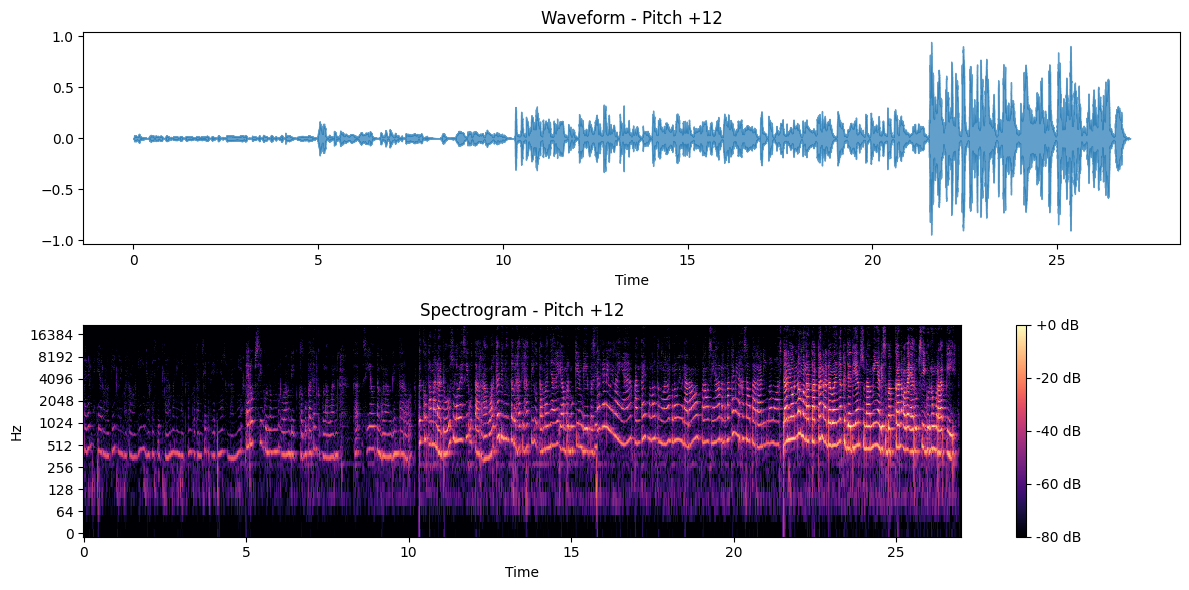

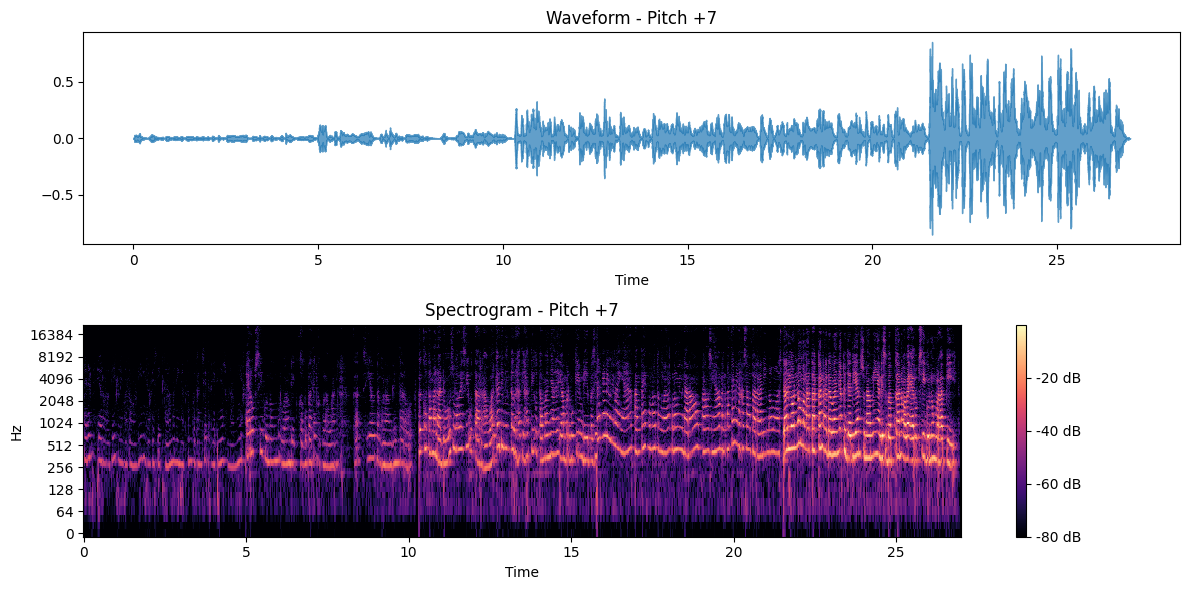

In [50]:
# Visualize pitch shifted audios
plot_waveform_spectrogram(pitch_up_12, sr, 'Pitch +12')
plot_waveform_spectrogram(pitch_up_7, sr, 'Pitch +7')


In [51]:
# Save pitch shifted audios
output_dir = os.path.join(os.getcwd(), 'file_audio', 'output_pitch')
os.makedirs(output_dir, exist_ok=True)


# Use soundfile to save the shifted pitch audios (librosa no longer has write_wav)
import soundfile as sf

In [52]:

pitch_12_path = os.path.join(output_dir, 'berita_pitch_up_12.wav')
pitch_7_path = os.path.join(output_dir, 'berita_pitch_up_7.wav')

In [53]:

# Save pitch shifted audios using soundfile
sf.write(pitch_12_path, pitch_up_12, sr)
sf.write(pitch_7_path, pitch_up_7, sr)

In [54]:
# Combine both pitch-shifted audios into one file
combined_audio = np.concatenate([pitch_up_12, pitch_up_7])

In [55]:

# Save the combined audio
combined_path = os.path.join(output_dir, 'combined_pitch_audio.wav')
sf.write(combined_path, combined_audio, sr)

### Analisis:
Pitch Shifting

- Menggunakan `librosa.effects.pitch_shift()` dengan parameter:
  - `n_steps=7` (menaikkan pitch sedang)
  - `n_steps=12` (menaikkan pitch satu oktaf penuh)
- Tujuan: Mengubah pitch suara asli tanpa mengubah durasi (kecepatan tetap).

---

Efek Visual (Spektrogram)

- Frekuensi pada **spektrogram** bergeser ke atas ketika pitch diubah.
- Semakin tinggi pitch:
  - Frekuensi menjadi lebih terkonsentrasi pada bagian atas rentang spektrum.
  - Warna dan pola pada spektrogram menunjukkan peningkatan aktivitas di frekuensi tinggi.

---

Efek Audio

- **Pitch lebih tinggi** menghasilkan suara yang lebih **tajam** dan terdengar lebih **cepat**, seperti suara **chipmunk**.
- Suara tetap **dapat dipahami**, namun:
  - **Kehilangan karakter alami**
  - Terasa sebagai **efek suara lucu atau kreatif**

---

Penggunaan Pitch Shifting

- Sangat berguna untuk **efek suara kreatif**
- Umumnya dipakai di:
  - Industri hiburan (kartun, karakter suara unik)
  - Pengolahan audio dalam media kreatif (konten video, podcast, musik eksperimental)


## Soal 5: Normalisasi dan Loudness Optimization

### Rekaman yang Digunakan:
Untuk soal ini, saya menggunakan hasil audio dari Soal 4 yang telah di-*pitch shift* menjadi suara seperti chipmunk dan telah digabungkan menjadi satu file (`chipmunk_pitch_audio.wav`).

---

### Tujuan:
Melakukan proses:
- **Normalisasi**: mengatur gain agar audio mencapai level tertentu
- **Loudness Optimization**: menyesuaikan loudness rata-rata ke **target -18 LUFS** untuk kenyamanan dengar

---

### Metode:
- Saya menggunakan pustaka `pyloudnorm` untuk menghitung dan mengoptimalkan **LUFS** (Loudness Units Full Scale)
- Proses normalisasi ini berbasis pada loudness persepsi manusia, bukan hanya *peak amplitude*
- Dibandingkan dengan normalisasi peak tradisional

---

### Langkah-Langkah yang Dilakukan:
1. Memuat file audio hasil pitch shifting
2. Menghitung loudness awal (LUFS)
3. Menerapkan normalisasi agar target loudness = -18 LUFS
4. Visualisasi waveform dan spektrogram:
   - Sebelum normalisasi
   - Sesudah normalisasi
5. Menganalisis perubahan kualitas suara

---

### Output:
Hasil audio setelah normalisasi disimpan sebagai:
`chipmunk_loudness_normalized.wav`


In [56]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import soundfile as sf

In [57]:

# Path to the combined chipmunk audio
file_path = os.path.join(os.getcwd(), 'file_audio', 'output_pitch', 'combined_pitch_audio.wav')

In [58]:
# Load the audio file
audio_data, sr = librosa.load(file_path, sr=None)
print(f"Sampling Rate: {sr}")
print(f"Duration of the audio: {librosa.get_duration(y=audio_data, sr=sr):.2f} seconds")

Sampling Rate: 44100
Duration of the audio: 53.96 seconds


In [59]:
# Function to plot waveform and spectrogram
def plot_waveform_spectrogram(y, sr, title):
    fig, axs = plt.subplots(2, 1, figsize=(12, 6))
    
    # Waveform
    librosa.display.waveshow(y, sr=sr, ax=axs[0], alpha=0.7)
    axs[0].set_title(f"Waveform - {title}")
    
    # Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axs[1])
    axs[1].set_title(f"Spectrogram - {title}")
    fig.colorbar(img, ax=axs[1], format="%+2.0f dB")
    
    plt.tight_layout()
    plt.show()

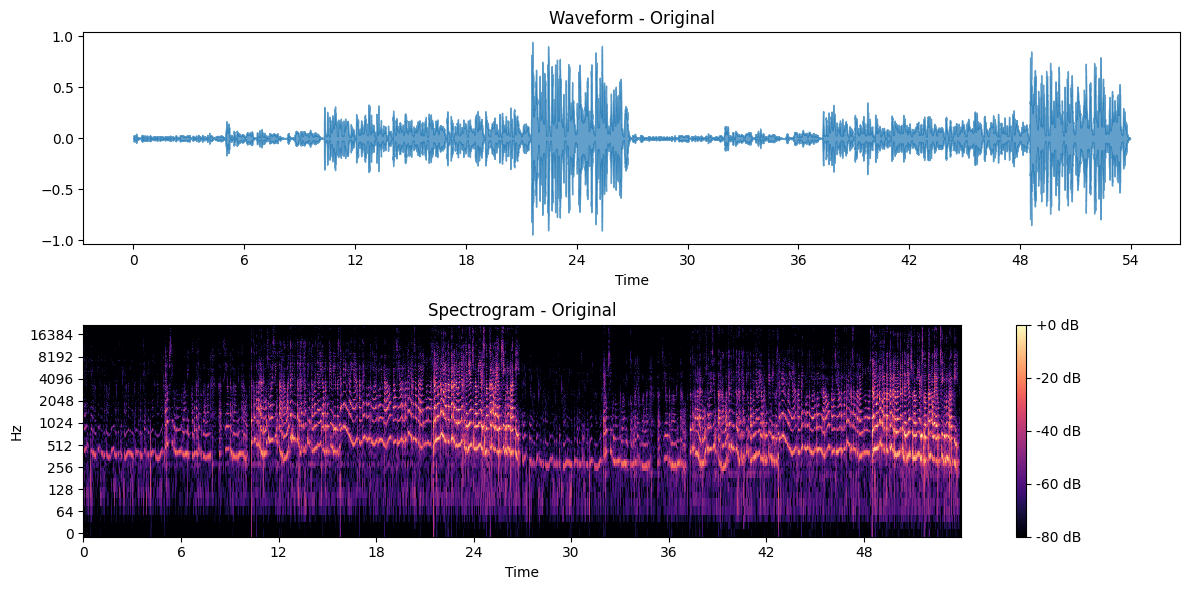

In [60]:
# Visualize original audio
plot_waveform_spectrogram(audio_data, sr, 'Original')

In [61]:
# Step 1: Calculate initial loudness (LUFS) using librosa
def calculate_loudness(y, sr):
    # Using RMS energy as a proxy for loudness (simplified)
    rms = librosa.feature.rms(y=y)[0]
    loudness = 20 * np.log10(np.mean(rms))  # Convert RMS to dB
    return loudness

In [62]:

initial_loudness = calculate_loudness(audio_data, sr)
print(f"Initial loudness: {initial_loudness:.2f} dB")

Initial loudness: -25.68 dB


In [63]:
# Step 2: Calculate the gain needed to reach target loudness (-18 LUFS)
target_loudness = -18  # Target loudness in dB
gain_needed = target_loudness - initial_loudness
print(f"Gain needed to reach {target_loudness} dB: {gain_needed:.2f} dB")

Gain needed to reach -18 dB: 7.68 dB


In [64]:

# Normalize the audio by applying the calculated gain
def normalize_audio(audio_data, gain_db):
    # Convert dB to linear gain
    gain_linear = 10 ** (gain_db / 20.0)
    
    # Apply gain
    normalized_audio = audio_data * gain_linear
    
    # Clip to prevent distortion
    normalized_audio = np.clip(normalized_audio, -1.0, 1.0)
    
    return normalized_audio

In [65]:

# Apply the gain to normalize the audio
normalized_audio = normalize_audio(audio_data, gain_needed)

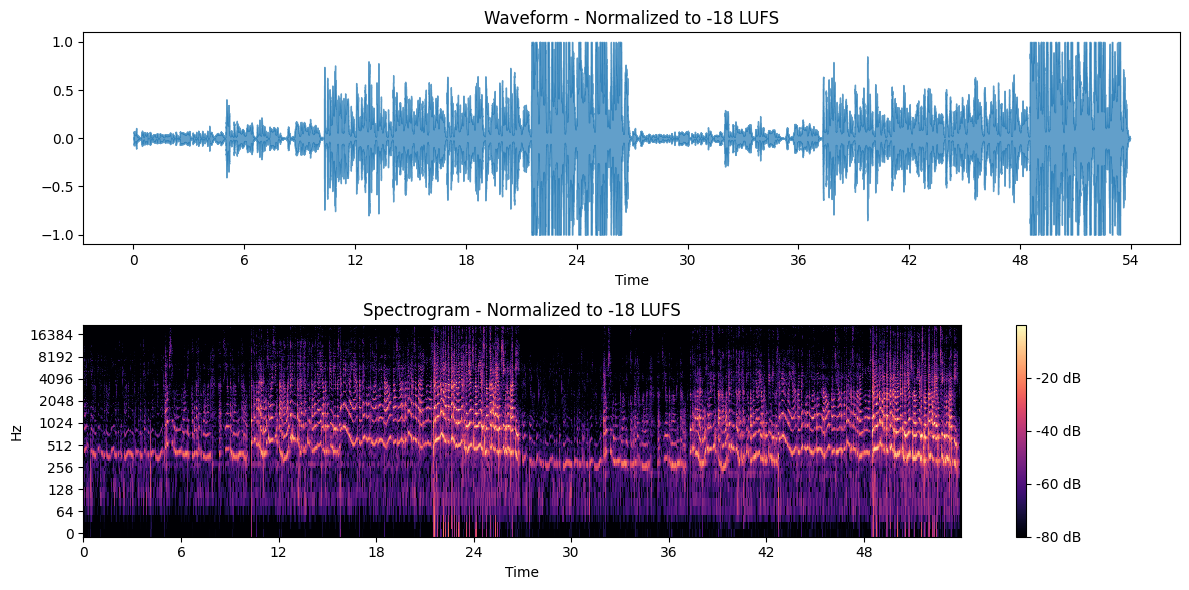

In [66]:
# Step 3: Visualize the normalized audio
plot_waveform_spectrogram(normalized_audio, sr, f'Normalized to {target_loudness} LUFS')


In [67]:

# Save the normalized audio
output_dir = os.path.join(os.getcwd(), 'file_audio', 'output_loudness')
os.makedirs(output_dir, exist_ok=True)

In [68]:
normalized_audio_path = os.path.join(output_dir, 'chipmunk_loudness_normalized_manual.wav')

In [69]:

# Save the normalized audio using soundfile
sf.write(normalized_audio_path, normalized_audio, sr)

### Analisis:

1. **Perubahan Dinamika Suara yang Terjadi**:
- **Sebelum normalisasi**: Dari gambar waveform dan spektrogram, dapat dilihat bahwa amplitudo suara bervariasi dengan cukup lebar. Terdapat bagian-bagian di mana suara sangat kecil (berada di bawah garis nol), serta bagian yang lebih keras dengan amplitudo yang jauh lebih tinggi.
- **Setelah normalisasi loudness**: Amplitudo suara menjadi lebih konsisten dan terkontrol. Hal ini mengindikasikan bahwa suara yang lebih keras telah ditekan, sementara suara yang lebih pelan telah diperkuat untuk mencapai level loudness yang lebih seragam dan sesuai target LUFS.

2. **Perbedaan antara Normalisasi Peak dan Normalisasi LUFS**:
- **Normalisasi Peak**: Biasanya hanya berfokus pada puncak amplitudo tertinggi dari rekaman. Proses ini dapat menyebabkan distorsi jika amplitudo puncaknya sangat tinggi, tetapi tidak memberikan kontrol terhadap keseluruhan dinamika audio.
- **Normalisasi LUFS**: Berfokus pada loudness perseptual, yaitu seberapa keras suara terdengar bagi pendengar. Normalisasi LUFS lebih memperhatikan persepsi pendengaran manusia daripada hanya menilai amplitudo puncak, sehingga menghasilkan suara yang lebih konsisten dengan kualitas lebih terjaga dan menghindari distorsi.

3. **Bagaimana Kualitas Suara Berubah Setelah Proses Normalisasi dan Loudness Optimization**:
- **Suara menjadi lebih konsisten**: Setelah normalisasi LUFS, perbedaan antara bagian suara yang keras dan yang pelan menjadi lebih halus, menghasilkan rekaman yang lebih mudah didengarkan dalam lingkungan yang bising.
- **Penguatan suara pelan dan penurunan suara keras**: Suara yang tadinya terlalu pelan kini lebih terdengar jelas, sementara bagian yang terlalu keras lebih terkontrol.
- **Kualitas suara tetap terjaga**: Meskipun terdapat perubahan dalam tingkat loudness, kualitas suara, terutama dalam hal kejelasan ucapan atau instrumen, tetap terjaga tanpa adanya distorsi signifikan.

4. **Kelebihan dan Kekurangan dari Pengoptimalan Loudness dalam Konteks Rekaman Suara**:

**Kelebihan**:
- **Konsistensi**: Mengoptimalkan loudness dengan menggunakan LUFS membuat audio lebih konsisten dan dapat dipahami dengan lebih jelas, terutama dalam konteks rekaman radio atau podcast.
- **Kontrol yang lebih baik atas dinamika**: Menggunakan LUFS memberikan kontrol lebih baik terhadap dinamika suara, sehingga tidak ada bagian suara yang terlalu keras atau terlalu pelan.
- **Penggunaan standar industri**: LUFS telah menjadi standar di banyak platform dan aplikasi streaming untuk memberikan pengalaman mendengarkan yang lebih seimbang dan nyaman.

**Kekurangan**:
- **Distorsi pada suara yang sangat keras**: Jika level audio sangat tinggi sebelum normalisasi, pengurangan loudness untuk mencapai target LUFS bisa menyebabkan suara terdengar datar dan kehilangan ekspresinya.
- **Mungkin mengurangi karakter audio**: Kadang-kadang normalisasi yang terlalu ketat dapat membuat audio terasa kurang alami, menghilangkan keunikan suara asli atau dinamika musik yang seharusnya ada.



## Kredit dan Referensi

### Referensi Pembelajaran:
- [Modul Hands-On 1 (Audio Processing - IF4021)](https://github.com/informatika-itera/if4021-handson/blob/main/1_Module_Audio.ipynb)
- [Matplotlib Colormap Reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

---

### Percakapan dengan ChatGPT:
- [Riwayat Diskusi di Google Drive](https://drive.google.com/drive/folders/1gPmMH7YiiDmYg40ca8kqykiKrwCnD-zK?usp=sharing)
